In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

In [76]:
df= pd.read_csv("/content/drive/MyDrive/FinalAssessment/train.csv")
df=pd.DataFrame(df)
df.head()


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [77]:
# Dataset description
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# List of attributes (columns)
columns = df.columns.tolist()
print("\nList of Attributes (Columns):")
print(columns)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB
None

Summary Statistics:
              v.id    on road old  on road now        years             km  \
count  1000.000000    1000.000000    1000.0000  1000.000000    1000.000000   
mean    500.500000  60

In [78]:
print("\nMissing Values:")
print(df.isnull().sum())
df = df.drop(columns=["v.id"], errors='ignore')


Missing Values:
v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64


#Exploring data through visualization


<ipython-input-101-c6d8f7d1e804>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["hp"], y=df["current price"], palette="Set2")


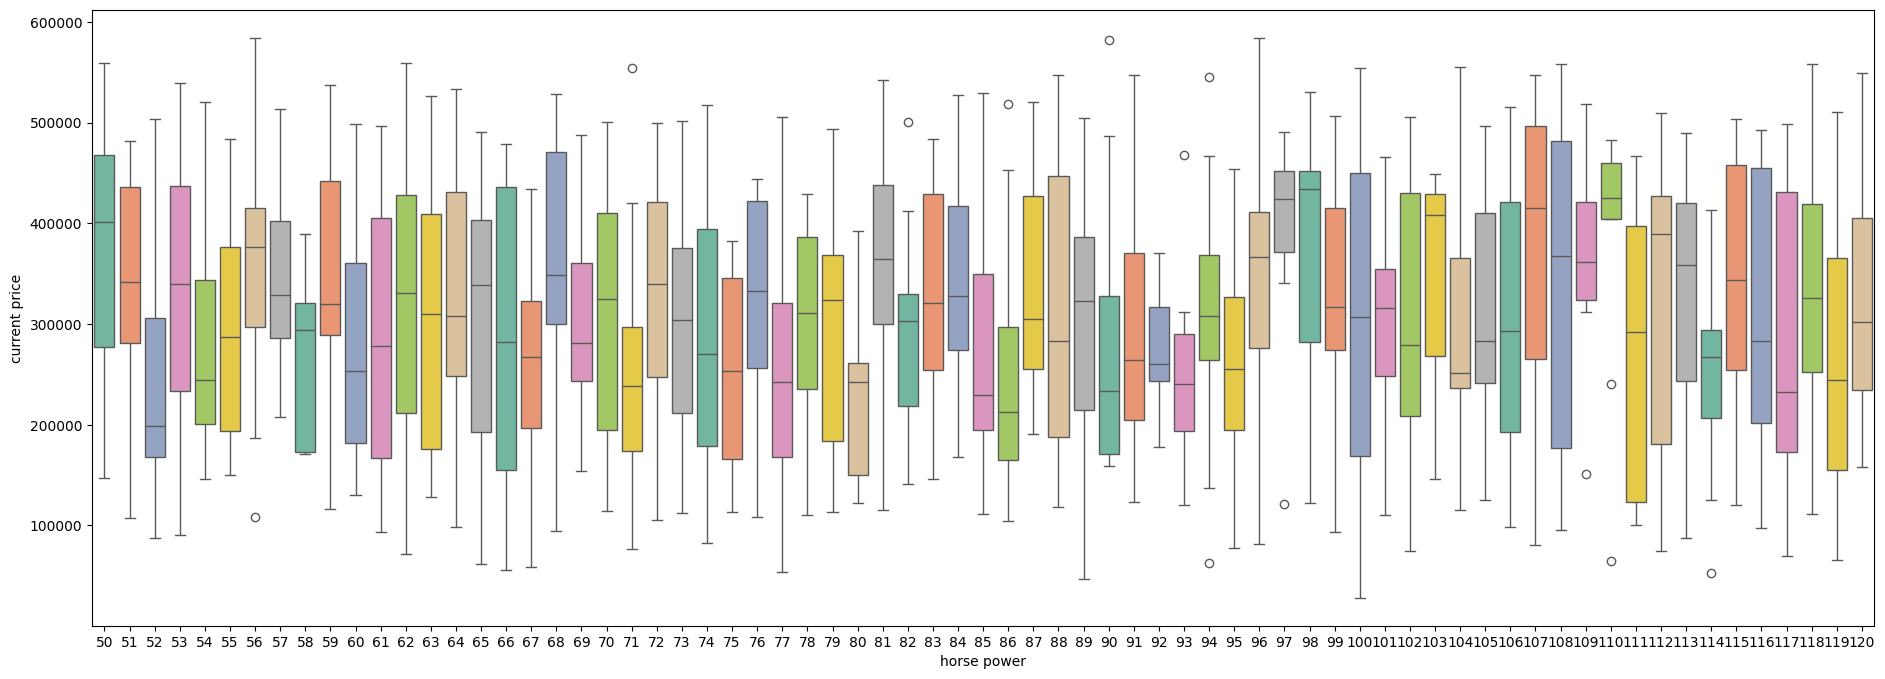

In [101]:
plt.figure(figsize=(23,8))
sns.boxplot(x=df["hp"], y=df["current price"], palette="Set2")
plt.xlabel("horse power")
plt.ylabel("current price")
plt.title("")
plt.show()

### Histogram (Distribution of price vs frequency)

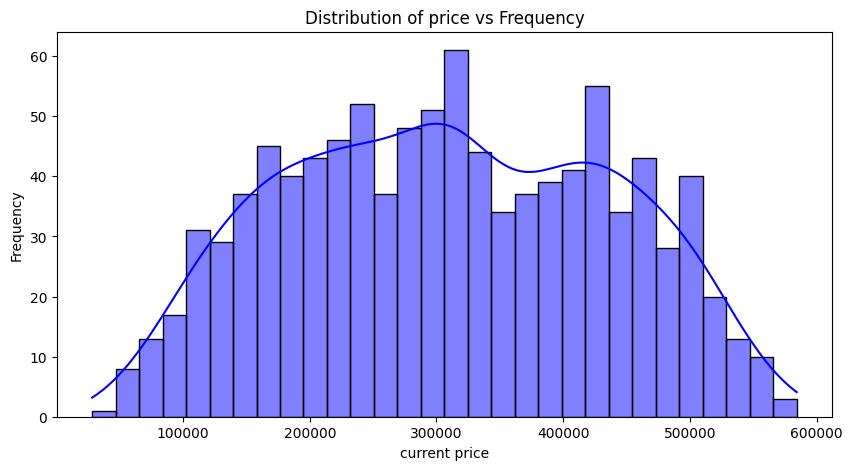

In [103]:
plt.figure(figsize=(10,5))
sns.histplot(df["current price"], bins=30, kde=True, color="blue")
plt.xlabel("current price")
plt.ylabel("Frequency")
plt.title("Distribution of price vs Frequency")
plt.show()

###Bar Plot (Torque vs price)

<ipython-input-107-5336ffcaab4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["torque"], y=df["current price"], palette="coolwarm")


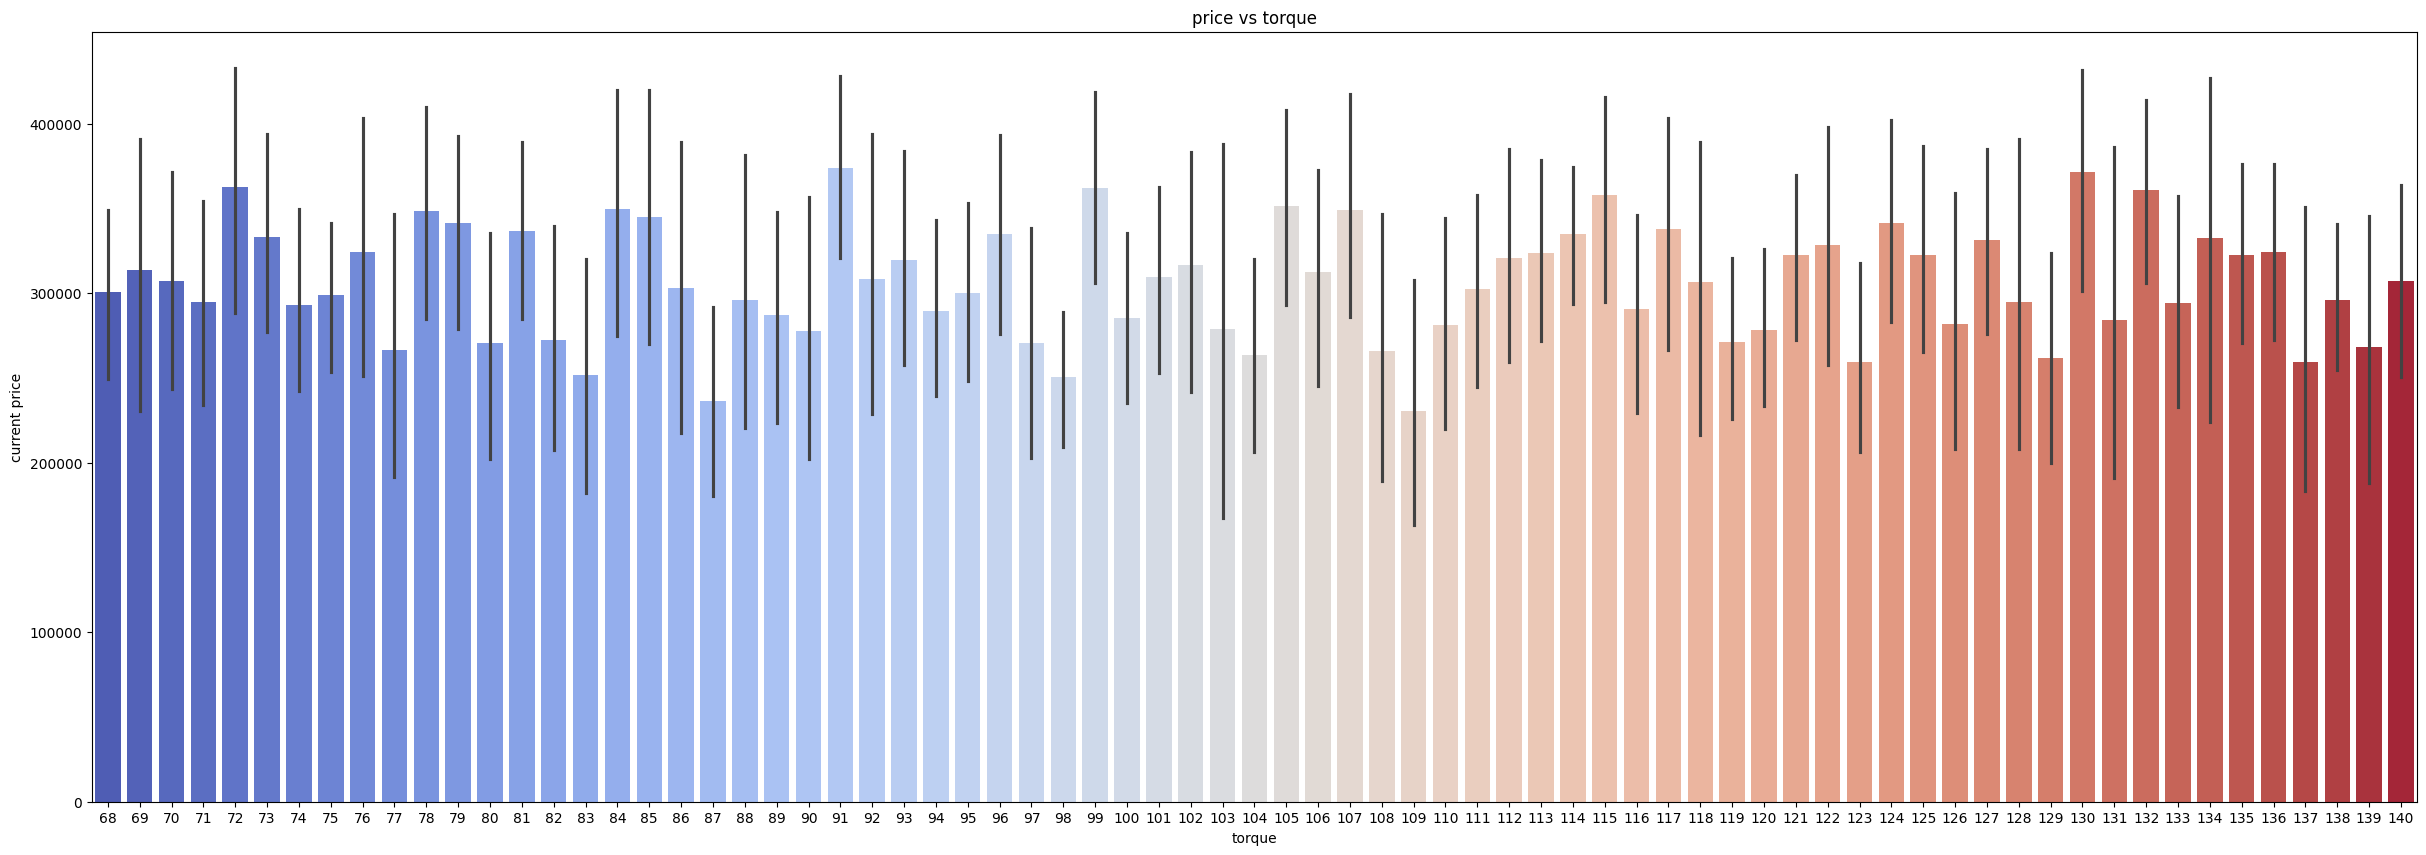

In [107]:
plt.figure(figsize=(30,10))
sns.barplot(x=df["torque"], y=df["current price"], palette="coolwarm")
plt.xlabel("torque")
plt.ylabel("current price")
plt.title("price vs torque")
plt.show()


In [82]:
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    # Your code here:
    m= len(Y)

    J= np.sum((X.dot(W) - Y)**2)/(2*m)
    return J

In [83]:

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(W)
        # Difference b/w Hypothesis and Actual Y
        loss = Y-Y_pred
        # Gradient Calculation
        dw = - X.T.dot(loss)/m
        # Changing Values of B using Gradient
        W_update = W - alpha *dw
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost

    return W_update, cost_history

In [84]:
x = df.drop(columns=['current price'])
# Define the target variable
y = df['current price']

# Split the dataset into 80% training data and 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights
W = np.zeros(X_train.shape[1])

alpha = 0.01
# Train the model using gradient descent
new_weights, cost_history = gradient_descent(X_train, Y_train, W, alpha, 1000)
print(new_weights)
print(cost_history[-1])

# Make predictions on the test set
Y_pred = X_test.dot(new_weights)

inital_cost = cost_function(x, y, W)
print(inital_cost)

[  293.62919372   342.31063363   -10.08791312 -1167.944041
    59.38263881   139.07842592   -49.22775234   -37.4485971
    76.45138167    21.5368164 ]
55023985777.887596
55531656119.12412


In [85]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
rse= np.sqrt(mse)
print(f"Root Mean Squared Error: {rse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error: 113481957658.61118
Root Mean Squared Error: 336870.83230610983
Root Mean Squared Error (RMSE): 336870.83230610983


In [94]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['current price'])
y = df['current price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Example: Assume X_train, X_test, y_train, y_test are your datasets
degree = 2  # You can change the degree to test different polynomial levels
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


Mean Squared Error (MSE): 9868963.6158
R-squared Score (R²): 0.9994


In [88]:
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Training models
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Evaluating models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"R-squared Score: {r2_score(y_true, y_pred):.4f}\n")

evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Decision Tree Regression Performance:
Mean Squared Error: 947947254.6063
Mean Absolute Error: 22598.6175
R-squared Score: 0.9436

Random Forest Performance:
Mean Squared Error: 371986884.3524
Mean Absolute Error: 14884.3255
R-squared Score: 0.9779



In [89]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)
print(f"Best R2 Score: {grid_search.best_score_:.4f}")

Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best R2 Score: 0.9774


In [90]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree Regressor:")
print(grid_search_dt.best_params_)
print(f"Best R2 Score: {grid_search_dt.best_score_:.4f}")

Best Hyperparameters for Decision Tree Regressor:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best R2 Score: 0.9392


In [91]:
from sklearn.feature_selection import SelectFromModel

# Initialize models
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

# Fit Random Forest Regressor
rf_model.fit(X_train, y_train)
# Fit Decision Tree Regressor
dt_model.fit(X_train, y_train)

# SelectFromModel for Random Forest
rf_selector = SelectFromModel(rf_model, threshold="mean", max_features=6)
X_selected_rf = rf_selector.transform(X_train)

# SelectFromModel for Decision Tree
dt_selector = SelectFromModel(dt_model, threshold="mean", max_features=6)
X_selected_dt = dt_selector.transform(X_train)

print("Selected features from Random Forest (indices):", rf_selector.get_support())
print("Selected features from Decision Tree (indices):", dt_selector.get_support())

# Get the selected feature names
selected_rf_features = x.columns[rf_selector.get_support()]
selected_dt_features = x.columns[dt_selector.get_support()]

print("Selected features from Random Forest:", selected_rf_features)
print("Selected features from Decision Tree:", selected_dt_features)

Selected features from Random Forest (indices): [False False False  True False False False False False False]
Selected features from Decision Tree (indices): [False False False  True False False False False False False]
Selected features from Random Forest: Index(['km'], dtype='object')
Selected features from Decision Tree: Index(['km'], dtype='object')


<ipython-input-109-e845265cae52>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='Blues_d')


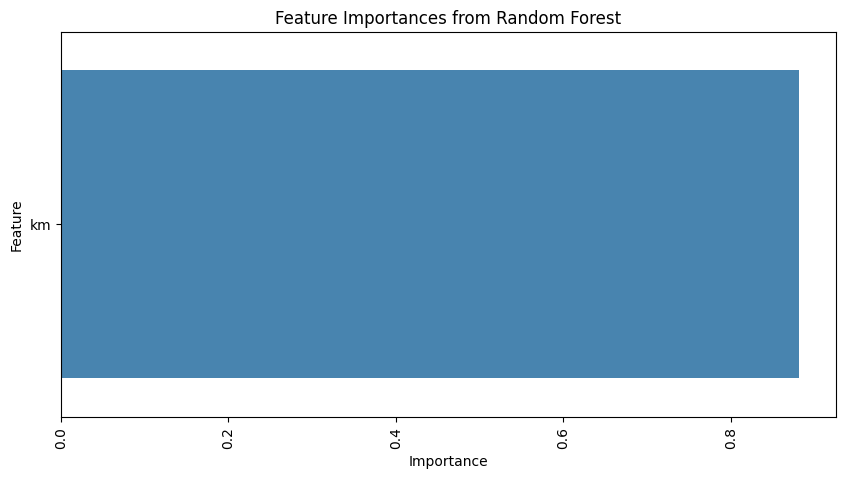

<ipython-input-109-e845265cae52>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_importance_df, palette='Greens_d')


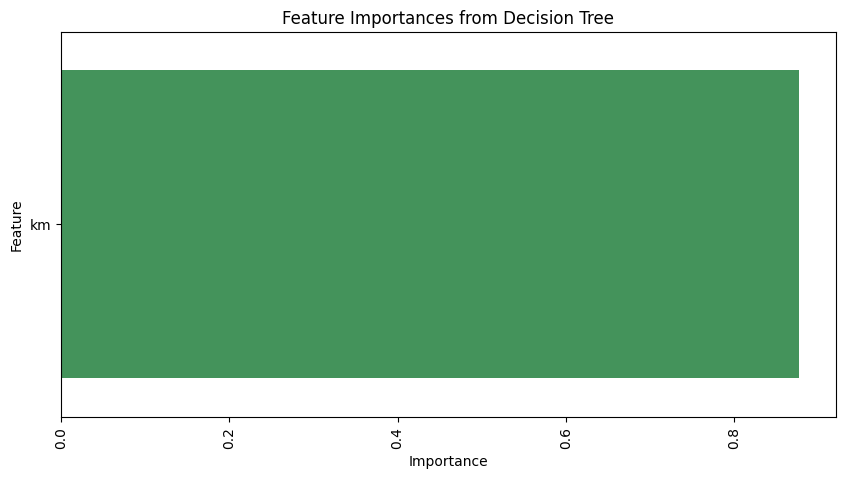

In [109]:
# Get feature importances
rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_

# Get the names of the selected features
selected_rf_features = X.columns[rf_selector.get_support()]
selected_dt_features = X.columns[dt_selector.get_support()]

# Extract the importance of the selected features
rf_selected_importances = rf_importances[rf_selector.get_support()]
dt_selected_importances = dt_importances[dt_selector.get_support()]
rf_importance_df = pd.DataFrame({
    'Feature': selected_rf_features,
    'Importance': rf_selected_importances
})

dt_importance_df = pd.DataFrame({
    'Feature': selected_dt_features,
    'Importance': dt_selected_importances
})

# Plot the feature importances for Random Forest
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='Blues_d')
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.title('Feature Importances from Random Forest')
plt.show()

# Plot the feature importances for Decision Tree
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df, palette='Greens_d')
plt.xticks(rotation=90)
plt.title('Feature Importances from Decision Tree')
plt.show()



Random Forest Regressor Evaluation:
Mean Absolute Error: 14866.6796
Mean Squared Error: 362815672.9020
R^2 Score: 0.9784


<ipython-input-93-02d8d2403916>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')


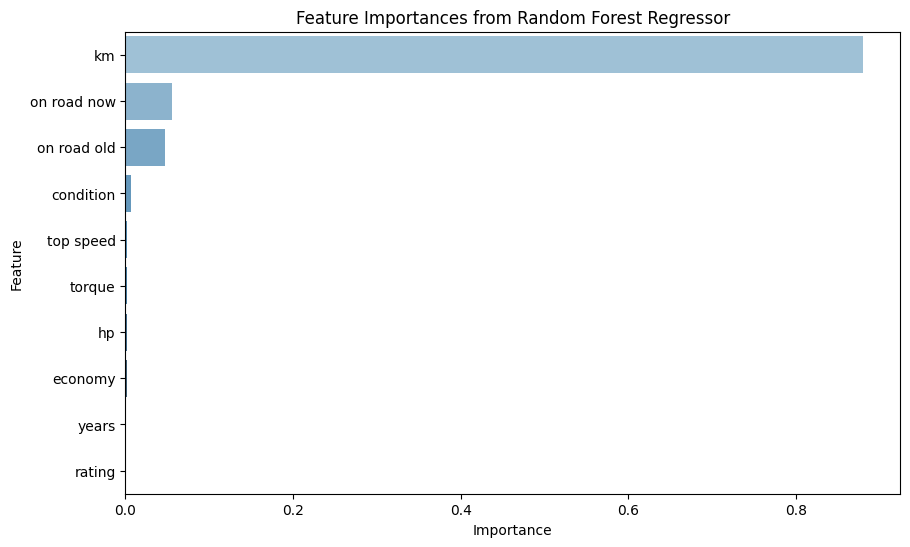

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_train_scaled_df and x_test_scaled_df are DataFrames with scaled features
x_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
x_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)
# Select the important features from Task 5
selected_features_rf = ['on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque']

# Subset the dataset with selected features
x_train_rf = x_train_scaled_df[selected_features_rf]
x_test_rf = x_test_scaled_df[selected_features_rf]

# Rebuild Random Forest Regressor model with optimal hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=150, max_depth=10, min_samples_split=2, random_state=42)
rf_regressor.fit(x_train_rf, y_train)

# Predict with the trained model
y_pred_rf = rf_regressor.predict(x_test_rf)

# Evaluate Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Evaluation:")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R^2 Score: {r2_rf:.4f}")

# Feature Importance Plot
feature_importances = rf_regressor.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features_rf,
    'Importance': feature_importances
})

# Sort by feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()


